# Binary hypothesis testing

Binary hypothesis testing is the problem of deciding between two competing hypotheses:

* $ H_0 $: null hypothesis
* $ H_1 $: alternative hypothesis

Based on an observation ( X ), we want to decide which hypothesis is more likely.

A standard method is the **Likelihood ratio test (LRT)**:

\begin{align}
\Lambda(x) = \frac{f_1(x)}{f_0(x)}
\underset{H_0}{\overset{H_1}{\gtrless}}
\eta\nonumber
\end{align}

If the likelihood ratio is **greater than the threshold** ( \eta ), we decide (H_1); otherwise (H_0).

---

# 1. Problem setup

We consider a simple example:

* Under ( $H_0: X \sim \mathcal{N}(\mu_0, \sigma^2$) )
* Under ( $H_1: X \sim \mathcal{N}(\mu_1, \sigma^2$) )

Given samples from both distributions, we perform hypothesis testing using the LRT.

Parameters:

* ( $\mu_0 = 0$ )
* ( $\mu_1 = 2$ )
* ( $\sigma = 1$ )

---

# 2. Generating data

We generate synthetic samples:

* ( $X_0$ ) → drawn from ( $H_0$ )
* ( $X_1$ ) → drawn from ( $H_1$ )

This allows us to empirically estimate error probabilities.

---

# 3. Likelihood ratio

For Gaussian distributions, the PDF is:

\begin{align}
f(x \mid \mu, \sigma) = \frac{1}{\sqrt{2\pi}\sigma}
\exp\left( -\frac{(x - \mu)^2}{2\sigma^2} \right)\nonumber
\end{align}

The likelihood ratio is computed as:

\begin{align}
\Lambda(x) = \frac{f_1(x)}{f_0(x)}\nonumber
\end{align}

This is done for every sample.

---

# 4. Decision rule (Likelihood ratio test)

For a chosen threshold ( $\eta$ ):

* If ( $\Lambda(x) > \eta$ ), decide **( $H_1 $)**
* Otherwise decide **( $H_0$ )**

From this, we compute:

* **Type-I error (false alarm):**
  \begin{align}
  P_{FA} = P(\text{decide } H_1 \mid H_0)\nonumber
  \end{align}

* **Detection probability:**
  \begin{align}
  P_D = P(\text{decide } H_1 \mid H_1)\nonumber
  \end{align}

* **Miss probability (Type-II):**
  \begin{align}
  P_M = 1 - P_D\nonumber
  \end{align}

---

# 5. ROC curve

By sweeping the threshold ( $\eta$ ) across a wide range and recalculating:

* ( $P_{FA}(\eta)$ )
* ( $P_D(\eta)$ )

we plot the **Receiver Operating Characteristic (ROC) curve**, showing the trade-off between false alarms and detection.

---



---- RESULTS ----
False Alarm Probability P_FA = 0.1537
Detection Probability   P_D  = 0.8368
Miss Probability        P_M  = 0.1632


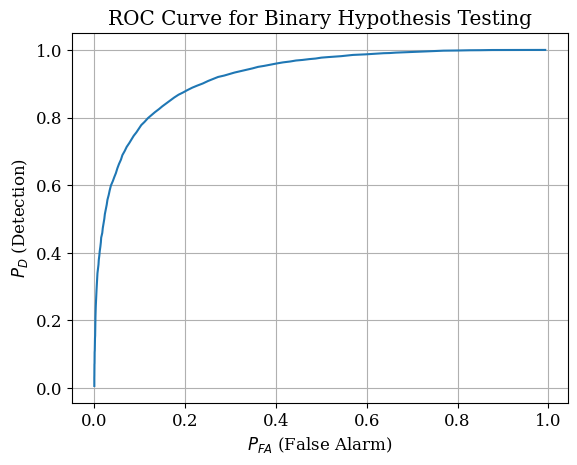

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
plt.rcParams.update({
    "text.usetex": False,          # enable LaTeX
    "font.family": "serif",
    "font.size": 12
})
# 1. PARAMETERS
mu0, mu1 = 0, 2       # Means under H0 and H1
sigma = 1             # Standard deviation
eta = 1.0             # Likelihood threshold (change to tune)

N = 10000             # Number of sample points

# 2. Generate samples
X0 = np.random.normal(mu0, sigma, N)  # under H0
X1 = np.random.normal(mu1, sigma, N)  # under H1

# 3. Compute likelihood ratio
def likelihood_ratio(x):
    f0 = norm.pdf(x, mu0, sigma)
    f1 = norm.pdf(x, mu1, sigma)
    return f1 / f0

LR0 = likelihood_ratio(X0)
LR1 = likelihood_ratio(X1)


# 4. Decision rule
dec0 = LR0 > eta   # false alarms
dec1 = LR1 > eta   # correct detections

P_FA = np.mean(dec0)   # Type-I
P_D  = np.mean(dec1)   # 1 - Type-II
P_M  = 1 - P_D         # Type-II

print("---- RESULTS ----")
print(f"False Alarm Probability P_FA = {P_FA:.4f}")
print(f"Detection Probability   P_D  = {P_D:.4f}")
print(f"Miss Probability        P_M  = {P_M:.4f}")

# 5. Optional: ROC curve
etas = np.logspace(-3, 3, 200)
P_FA_list = []
P_D_list  = []

for e in etas:
    P_FA_list.append(np.mean(LR0 > e))
    P_D_list.append(np.mean(LR1 > e))

plt.plot(P_FA_list, P_D_list)
plt.xlabel(r"$P_{FA}$ (False Alarm)")
plt.ylabel(r"$P_D$ (Detection)")
plt.title("ROC Curve for Binary Hypothesis Testing")
plt.grid(True)
plt.show()


### Demonstrate saturation of the classical Chernoff bound (discrete case).
### Example: Bernoulli distributions $P_0$ = Bern($p_0$), $P_1$ = Bern($p_1$).


Chernoff s* = 0.50000001, min_sum = 9.16515139e-01, Chernoff exponent xi = 0.08717669
n=  1  P_e ≈ 3.0085e-01   estimated rate -(1/n)logP_e = 1.201143
n=  2  P_e ≈ 2.9915e-01   estimated rate -(1/n)logP_e = 0.603405
n=  4  P_e ≈ 2.1510e-01   estimated rate -(1/n)logP_e = 0.384163
n=  8  P_e ≈ 1.2675e-01   estimated rate -(1/n)logP_e = 0.258192
n= 16  P_e ≈ 5.0000e-02   estimated rate -(1/n)logP_e = 0.187233
n= 32  P_e ≈ 8.6000e-03   estimated rate -(1/n)logP_e = 0.148625
n= 64  P_e ≈ 6.5000e-04   estimated rate -(1/n)logP_e = 0.114665
n=128  P_e ≈ 2.5000e-05   estimated rate -(1/n)logP_e = 0.082786


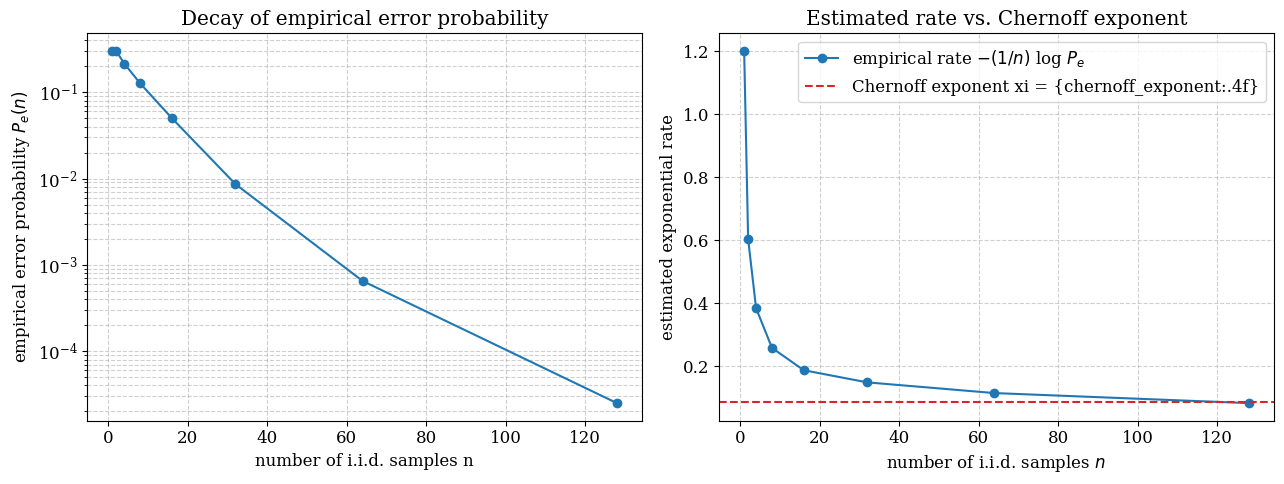


Summary table:
 $n$   ${P_e}_{empirical}$    $-(1/n) log P_e$    Chernoff $\xi$
  1   3.008500e-01        1.201143    0.087177
  2   2.991500e-01        0.603405    0.087177
  4   2.151000e-01        0.384163    0.087177
  8   1.267500e-01        0.258192    0.087177
 16   5.000000e-02        0.187233    0.087177
 32   8.600000e-03        0.148625    0.087177
 64   6.500000e-04        0.114665    0.087177
128   2.500000e-05        0.082786    0.087177


In [4]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
from math import log

# -----------------------------
# Problem setup: choose distributions
# -----------------------------
# Bernoulli parameters (change these to experiment)
p0 = 0.3     # P(X=1 | H0)
p1 = 0.7     # P(X=1 | H1)

# discrete alphabet {0,1}
support = [0, 1]

# pmf functions
def pmf0(x):
    return p0 if x == 1 else (1 - p0)

def pmf1(x):
    return p1 if x == 1 else (1 - p1)

# -----------------------------
# Chernoff exponent computation
# -----------------------------
def cher_func(s):
    # computes sum_x p0(x)^s * p1(x)^(1-s)
    val = 0.0
    for x in support:
        val += (pmf0(x) ** s) * (pmf1(x) ** (1.0 - s))
    return val

# minimize cher_func(s) over s in [0,1]
res = minimize_scalar(cher_func, bounds=(0.0, 1.0), method='bounded', options={'xatol':1e-12})
s_opt = res.x
min_sum = cher_func(s_opt)
chernoff_exponent = -np.log(min_sum)  # xi
print(f"Chernoff s* = {s_opt:.8f}, min_sum = {min_sum:.8e}, Chernoff exponent xi = {chernoff_exponent:.8f}")

# -----------------------------
# Simulation parameters
# -----------------------------
# sample sizes to test (powers of two give nice view)
Ns = np.array([1, 2, 4, 8, 16, 32, 64, 128])
num_trials = 20000  # number of Monte Carlo trials per n (increase if you want lower noise)

# to store results
P_e_est = []   # empirical error probabilities
rate_est = []  # estimated rates = - (1/n) * log(P_e)

rng = np.random.default_rng(42)

for n in Ns:
    errors = 0
    # perform num_trials independent experiments
    # each trial: choose H0 or H1 with equal prior 1/2, generate n i.i.d. samples, do LRT
    for _ in range(num_trials):
        true_hyp = rng.integers(0, 2)  # 0 -> H0, 1 -> H1 (equal priors)
        if true_hyp == 0:
            # draw n samples from P0
            samples = rng.random(n) < p0
            # compute log-likelihood ratio sum log p1(x)/p0(x)
            # for Bernoulli: for each sample x: log( p1^x (1-p1)^(1-x) / ( p0^x (1-p0)^(1-x) ) )
            # = x*log(p1/p0) + (1-x)*log((1-p1)/(1-p0))
            llr = int(np.sum(samples)) * np.log(p1 / p0) + (n - int(np.sum(samples))) * np.log((1 - p1) / (1 - p0))
            # decide H1 if llr > 0 (equal priors => threshold 0)
            decide_H1 = llr > 0
            if decide_H1:
                errors += 1
        else:
            # draw from P1
            samples = rng.random(n) < p1
            llr = int(np.sum(samples)) * np.log(p1 / p0) + (n - int(np.sum(samples))) * np.log((1 - p1) / (1 - p0))
            decide_H1 = llr > 0
            if not decide_H1:
                errors += 1

    P_e = errors / num_trials
    # guard against zero errors (rare but possible for large n) -- avoid log(0)
    if P_e == 0.0:
        # If zero, set to at most 1/(num_trials) for plotting/logging conservatively
        P_e = 1.0 / (num_trials * 2.0)
        print(f"Warning: observed zero errors at n={n}. Using conservative P_e={P_e:.1e} for rate estimate.")
    P_e_est.append(P_e)
    rate_est.append(-np.log(P_e) / n)

    print(f"n={n:3d}  P_e ≈ {P_e:.4e}   estimated rate -(1/n)logP_e = {rate_est[-1]:.6f}")

P_e_est = np.array(P_e_est)
rate_est = np.array(rate_est)

# -----------------------------
# Plots
# -----------------------------
fig, ax = plt.subplots(1, 2, figsize=(13, 5))

# (1) Error probability vs n on semilogy
ax[0].semilogy(Ns, P_e_est, marker='o', linestyle='-')
ax[0].set_xlabel("number of i.i.d. samples n")
ax[0].set_ylabel(r"empirical error probability $P_e(n)$")
ax[0].set_title("Decay of empirical error probability")
ax[0].grid(True, which='both', ls='--', alpha=0.6)

# (2) estimated rate vs n, show Chernoff exponent
ax[1].plot(Ns, rate_est, marker='o', linestyle='-', label=r'empirical rate $-(1/n)$ log $P_e$')
ax[1].axhline(chernoff_exponent, color='C3', linestyle='--', label='Chernoff exponent xi = {chernoff_exponent:.4f}')
ax[1].set_xlabel(r"number of i.i.d. samples $n$")
ax[1].set_ylabel("estimated exponential rate")
ax[1].set_title("Estimated rate vs. Chernoff exponent")
ax[1].legend()
ax[1].grid(True, ls='--', alpha=0.6)

plt.tight_layout()
plt.show()

# -----------------------------
# Small table summary
# -----------------------------
print("\nSummary table:")
print(r" $n$   ${P_e}_{empirical}$    $-(1/n) log P_e$    Chernoff $\xi$")
for n, pe, r in zip(Ns, P_e_est, rate_est):
    print(f"{n:3d}  {pe:13.6e}   {r:13.6f}    {chernoff_exponent:.6f}")


===== Chernoff Exponent Computation =====
Optimal s*        : 0.50000000
Sum p0^s p1^(1-s) : 9.16515139e-01
Chernoff exponent : 0.08717669

===== Empirical Error Probability =====
   n         P_e(n)       -(1/n) log P_e      Chernoff xi
------------------------------------------------------------
   1     3.0025e-01             1.203140         0.087177
   2     3.0260e-01             0.597672         0.087177
   4     2.1710e-01             0.381849         0.087177
   8     1.2545e-01             0.259481         0.087177
  16     5.3200e-02             0.183356         0.087177
  32     9.1000e-03             0.146859         0.087177
  64     2.5000e-04             0.129595         0.087177
 128     2.5000e-05             0.082786         0.087177


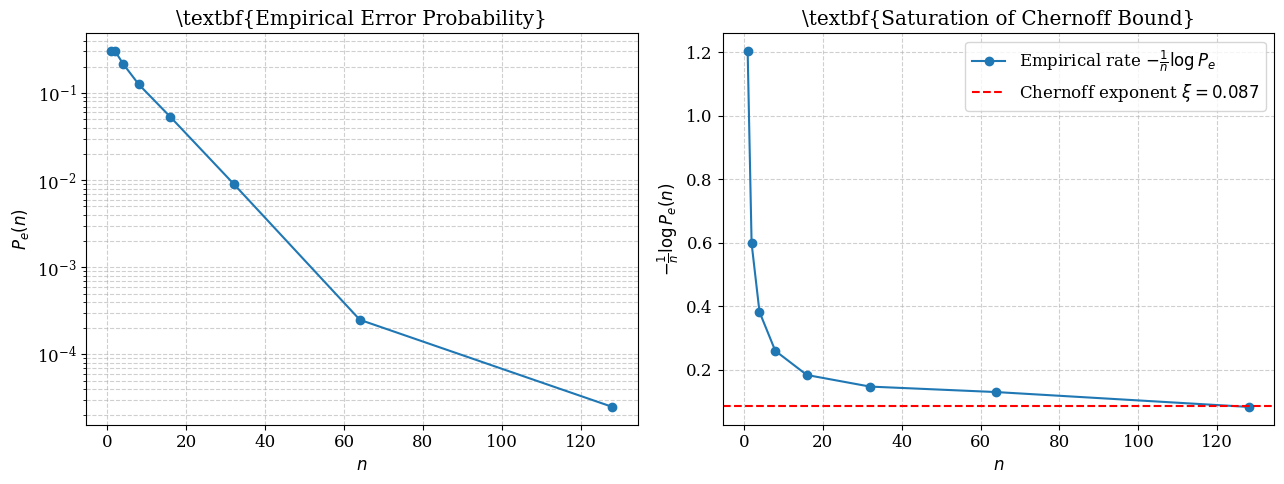

In [8]:
"""
Demonstrate saturation of the classical Chernoff bound (discrete i.i.d. case)
with LaTeX axes labels and clean printed output.
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

plt.rcParams.update({
    "text.usetex": False,          # enable LaTeX
    "font.family": "serif",
    "font.size": 12
})

# ---------------------------------
# Problem setup
# ---------------------------------
p0 = 0.3      # Bernoulli parameter under H0
p1 = 0.7      # Bernoulli parameter under H1

support = [0, 1]

def pmf0(x): return p0 if x == 1 else (1 - p0)
def pmf1(x): return p1 if x == 1 else (1 - p1)

# ---------------------------------
# Chernoff exponent calculation
# ---------------------------------
def cher_func(s):
    return sum((pmf0(x)**s) * (pmf1(x)**(1-s)) for x in support)

res = minimize_scalar(cher_func, bounds=(0,1), method='bounded')
s_opt = res.x
chernoff_sum = cher_func(s_opt)
chernoff_exp = -np.log(chernoff_sum)

print("===== Chernoff Exponent Computation =====")
print(f"Optimal s*        : {s_opt:.8f}")
print(f"Sum p0^s p1^(1-s) : {chernoff_sum:.8e}")
print(f"Chernoff exponent : {chernoff_exp:.8f}\n")

# ---------------------------------
# Monte Carlo simulation
# ---------------------------------
Ns = np.array([1,2,4,8,16,32,64,128])
num_trials = 20000

rng = np.random.default_rng(0)

P_e = []
rates = []

print("===== Empirical Error Probability =====")
print(f"{'n':>4}   {'P_e(n)':>12}   {'-(1/n) log P_e':>18}   {'Chernoff xi':>14}")
print("-"*60)

for n in Ns:
    errors = 0
    for _ in range(num_trials):
        true_h = rng.integers(0,2)
        # draw from correct hypothesis
        samples = rng.random(n) < (p0 if true_h==0 else p1)
        k = np.sum(samples)

        log_lr = k*np.log(p1/p0) + (n-k)*np.log((1-p1)/(1-p0))
        decide_H1 = (log_lr > 0)

        if true_h == 0 and decide_H1:
            errors += 1
        if true_h == 1 and not decide_H1:
            errors += 1

    pe = errors/num_trials
    if pe == 0:
        pe = 1/(2*num_trials)   # conservative substitute
    P_e.append(pe)
    rate = -np.log(pe)/n
    rates.append(rate)

    print(f"{n:4d}   {pe:12.4e}   {rate:18.6f}   {chernoff_exp:14.6f}")

P_e = np.array(P_e)
rates = np.array(rates)

# ---------------------------------
# Plotting with LaTeX labels
# ---------------------------------
fig, ax = plt.subplots(1, 2, figsize=(13,5))

# --- Plot 1: P_e(n) ---
ax[0].semilogy(Ns, P_e, marker='o')
ax[0].set_xlabel(r"$n$")
ax[0].set_ylabel(r"$P_e(n)$")
ax[0].set_title(r"\textbf{Empirical Error Probability}")
ax[0].grid(True, which="both", ls="--", alpha=0.6)

# --- Plot 2: Estimated rate vs Chernoff exponent ---
ax[1].plot(Ns, rates, marker='o', label=r"Empirical rate $-\frac{1}{n}\log P_e$")
ax[1].axhline(chernoff_exp, color="red", ls="--",
              label=fr"Chernoff exponent $\xi = {chernoff_exp:.3f}$")

ax[1].set_xlabel(r"$n$")
ax[1].set_ylabel(r"$-\frac{1}{n}\log P_e(n)$")
ax[1].set_title(r"\textbf{Saturation of Chernoff Bound}")
ax[1].legend()
ax[1].grid(True, ls="--", alpha=0.6)

plt.tight_layout()
plt.show()


=== Single-copy states ===
rho0 =
[[1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]
rho1 =
[[0.585 +0.j 0.4927+0.j]
 [0.4927+0.j 0.415 +0.j]]

=== Single-copy Helstrom result ===
Minimum error P_e (theoretical) = 0.17789116
Eigenvalues of Gamma: [-0.322109  0.322109]

=== Simulation (single-copy) ===
Empirical error estimate (shots=20000, equal-priors) = 0.178425

=== Collective Helstrom (n copies) ===
n =  1   P_e^(n) = 1.778912e-01   rate = - (1/n) log P_e = 1.726583
n =  2   P_e^(n) = 9.447743e-02   rate = - (1/n) log P_e = 1.179697
n =  3   P_e^(n) = 5.283805e-02   rate = - (1/n) log P_e = 0.980175
n =  4   P_e^(n) = 3.018748e-02   rate = - (1/n) log P_e = 0.875082
n =  5   P_e^(n) = 1.742990e-02   rate = - (1/n) log P_e = 0.809914
n =  6   P_e^(n) = 1.012092e-02   rate = - (1/n) log P_e = 0.765525

=== Quantum Chernoff Bound (QCB) ===
Optimal s* = 0.473098, Tr[rho0^s rho1^(1-s)] = 5.84983571e-01
QCB exponent xi_Q = 0.53617152


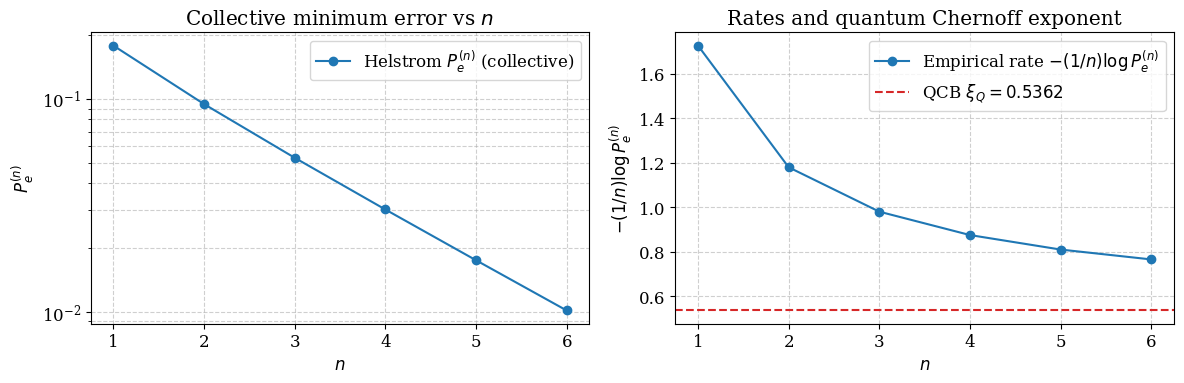


Summary table:
  n         P_e^(n)     rate = -(1/n)logP_e
  1    1.778912e-01                1.726583
  2    9.447743e-02                1.179697
  3    5.283805e-02                0.980175
  4    3.018748e-02                0.875082
  5    1.742990e-02                0.809914
  6    1.012092e-02                0.765525

Quantum Chernoff exponent xi_Q = 0.53617152


In [10]:
"""
Quantum binary hypothesis testing demo.

- Computes Helstrom optimal measurement and min. error for two quantum states (rho0, rho1)
- Simulates measurement outcomes and empirical error
- Computes collective Helstrom bound for n copies (small n)
- Computes quantum Chernoff exponent and compares rates
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh, fractional_matrix_power
from scipy.optimize import minimize_scalar

# --- utilities --------------------------------------------------------------

def is_hermitian(mat, tol=1e-10):
    return np.allclose(mat, mat.conj().T, atol=tol)

def trace(mat):
    return np.trace(mat)

def trace_norm(mat):
    # trace norm = sum of absolute singular values = sum absolute eigenvalues for Hermitian
    # ensure Hermitian
    vals = eigh((mat + mat.conj().T) / 2.0, eigvals_only=True)
    return np.sum(np.abs(vals))

def projector_on_positive_part(mat, tol=1e-12):
    # returns projector onto positive eigenspace of Hermitian mat
    vals, vecs = eigh((mat + mat.conj().T) / 2.0)
    pos_idx = vals > tol
    if np.any(pos_idx):
        P = (vecs[:, pos_idx] @ vecs[:, pos_idx].conj().T)
    else:
        P = np.zeros_like(mat, dtype=complex)
    return P

def pretty_print_matrix(mat, name="rho"):
    print(f"{name} =")
    with np.printoptions(precision=4, suppress=True):
        print(mat)

# --- Helstrom functions ----------------------------------------------------

def helstrom_min_error(rho0, rho1, pi0=0.5, pi1=0.5):
    """
    Returns:
      P_e_min (float) : minimum Bayes error
      Pi1 (ndarray)   : POVM element for deciding H1 (projector onto positive part of Gamma)
      Pi0 = I - Pi1
    Helstrom: Gamma = pi1*rho1 - pi0*rho0; Pi1 = projector_{Gamma>0}
    P_e_min = 1/2 * (1 - || pi1*rho1 - pi0*rho0 ||_1 )
    """
    Gamma = pi1 * rho1 - pi0 * rho0
    tn = trace_norm(Gamma)
    Pe = 0.5 * (1.0 - tn)
    Pi1 = projector_on_positive_part(Gamma)
    Pi0 = np.eye(rho0.shape[0]) - Pi1
    return Pe, Pi0, Pi1, Gamma

# --- quantum Chernoff exponent ----------------------------------------------

def qcb_exponent(rho0, rho1, s_tol=1e-8):
    """
    Compute quantum Chernoff exponent xi_Q = -log( min_{s in [0,1]} Tr[ rho0^s rho1^{1-s} ] )
    """
    def f_of_s(s):
        # compute trace( rho0^s rho1^{1-s} )
        # use fractional_matrix_power on Hermitian PSD matrices
        A = fractional_matrix_power(rho0, s)
        B = fractional_matrix_power(rho1, 1.0 - s)
        M = A @ B
        # ensure real (numerical)
        val = np.real_if_close(np.trace(M))
        return np.real(val)

    # minimize on [0,1]
    res = minimize_scalar(f_of_s, bounds=(0.0, 1.0), method='bounded', options={'xatol': s_tol})
    s_opt = res.x
    fmin = f_of_s(s_opt)
    xi = -np.log(fmin)
    return xi, s_opt, fmin

# --- simulation helper -----------------------------------------------------

def simulate_povm_decision(rho, Pi0, Pi1, num_shots=10000, rng=None):
    """
    Simulate repeated single-shot measurements of state 'rho' using POVM {Pi0, Pi1}.
    Returns empirical probabilities of deciding H0/H1 as (p_decide_H0, p_decide_H1).
    """
    if rng is None:
        rng = np.random.default_rng()
    p0 = np.real(np.trace(rho @ Pi0))
    p1 = np.real(np.trace(rho @ Pi1))
    # numerical small negative guard
    p0 = max(p0, 0.0)
    p1 = max(p1, 0.0)
    # renormalize if tiny numerical sum mismatch
    s = p0 + p1
    if not np.isclose(s, 1.0):
        p0 /= s
        p1 /= s
    counts = rng.multinomial(num_shots, [p0, p1])
    return counts / num_shots  # empirical frequencies

# --- example: qubit pure states --------------------------------------------

# single-qubit Pauli basis
zero = np.array([1.0, 0.0], dtype=complex)
one  = np.array([0.0, 1.0], dtype=complex)

# choose two pure states |psi0>, |psi1>
theta = 0.7  # angle between states (radians); adjust to vary distinguishability
psi0 = zero  # |0>
psi1 = np.cos(theta) * zero + np.sin(theta) * one
rho0 = np.outer(psi0, psi0.conj())
rho1 = np.outer(psi1, psi1.conj())

pi0 = 0.5
pi1 = 0.5

print("=== Single-copy states ===")
pretty_print_matrix(rho0, "rho0")
pretty_print_matrix(rho1, "rho1")
print()

# Helstrom single-copy
Pe_single, Pi0, Pi1, Gamma = helstrom_min_error(rho0, rho1, pi0, pi1)
print("=== Single-copy Helstrom result ===")
print(f"Minimum error P_e (theoretical) = {Pe_single:.8f}")
spectrum_Gamma = np.real_if_close(np.linalg.eigvals((Gamma + Gamma.conj().T)/2.0))
print("Eigenvalues of Gamma:", np.round(spectrum_Gamma, 6))
print()

# simulate single-shot measurement many times to estimate empirical error
rng = np.random.default_rng(12345)
shots = 20000
# simulate under H0 and H1 equally likely
counts_H0 = simulate_povm_decision(rho0, Pi0, Pi1, num_shots=shots, rng=rng)
counts_H1 = simulate_povm_decision(rho1, Pi0, Pi1, num_shots=shots, rng=rng)

# Under equal priors, average error:
# If true H0, error occurs when measure outcome '1'; if true H1, error when outcome '0'
emp_error = 0.5 * (counts_H0[1] + counts_H1[0])
print("=== Simulation (single-copy) ===")
print(f"Empirical error estimate (shots={shots}, equal-priors) = {emp_error:.6f}\n")

# --- compute collective Helstrom for n copies (small n) --------------------

def tensor_power(mat, n):
    """Return n-fold tensor product of matrix mat (mat ⊗ ... ⊗ mat)."""
    if n == 1:
        return mat
    out = mat
    for _ in range(n-1):
        out = np.kron(out, mat)
    return out

max_n = 6  # keep small because dimension grows 2^n for qubit example
Ns = list(range(1, max_n + 1))
Pe_collective = []
rates = []

print("=== Collective Helstrom (n copies) ===")
for n in Ns:
    R0 = tensor_power(rho0, n)
    R1 = tensor_power(rho1, n)
    Pe_n, _, _, _ = helstrom_min_error(R0, R1, pi0, pi1)
    Pe_collective.append(Pe_n)
    rate = -np.log(Pe_n) / n
    rates.append(rate)
    print(f"n = {n:2d}   P_e^(n) = {Pe_n:.6e}   rate = - (1/n) log P_e = {rate:.6f}")

# --- quantum Chernoff exponent ---------------------------------------------

xi_Q, s_opt, fmin = qcb_exponent(rho0, rho1)
print("\n=== Quantum Chernoff Bound (QCB) ===")
print(f"Optimal s* = {s_opt:.6f}, Tr[rho0^s rho1^(1-s)] = {fmin:.8e}")
print(f"QCB exponent xi_Q = {xi_Q:.8f}")

# --- plotting ----------------------------------------------------------------

plt.rcParams.update({
    "text.usetex": False,
    "font.size": 12,
    "font.family": "serif"
})

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# plot P_e^(n)
ax[0].semilogy(Ns, Pe_collective, marker='o', label=r'Helstrom $P_e^{(n)}$ (collective)')
ax[0].set_xlabel(r'$n$')
ax[0].set_ylabel(r'$P_e^{(n)}$')
ax[0].set_title(r'Collective minimum error vs $n$')
ax[0].grid(True, which='both', ls='--', alpha=0.6)
ax[0].legend()

# plot estimated rate and QCB
ax[1].plot(Ns, rates, marker='o', label=r'Empirical rate $-(1/n)\log P_e^{(n)}$')
ax[1].axhline(xi_Q, color='C3', linestyle='--', label=fr'QCB $\xi_Q={xi_Q:.4f}$')
ax[1].set_xlabel(r'$n$')
ax[1].set_ylabel(r'$-(1/n)\log P_e^{(n)}$')
ax[1].set_title('Rates and quantum Chernoff exponent')
ax[1].grid(True, ls='--', alpha=0.6)
ax[1].legend()

plt.tight_layout()
plt.show()

# --- final summary print -----------------------------------------------------
print("\nSummary table:")
print(f"{'n':>3}  {'P_e^(n)':>14}  {'rate = -(1/n)logP_e':>22}")
for n, pe, r in zip(Ns, Pe_collective, rates):
    print(f"{n:3d}  {pe:14.6e}  {r:22.6f}")
print(f"\nQuantum Chernoff exponent xi_Q = {xi_Q:.8f}")


### Variational Quantum Eigensolver (VQE) example for finding the ground state energy
### of a transverse-field Ising model (TFIM) Hamiltonian using Qiskit statevector simulator
### and classical optimizer.

### Features:
- Build TFIM Hamiltonian for n qubits: $H = -J * \sum Z_i Z_{i+1} - h * \sum X_i$
- Parameterized ansatz: layers of single-qubit RY rotations + CNOT entangling ladder
- Expectation value computed with exact statevector (no sampling noise)
- Classical optimizer (BFGS / COBYLA / SLSQP from SciPy)
- Comparison with exact diagonalization (numpy.linalg.eigvalsh)


In [12]:
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 78.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 74.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 4.8 MB/s eta 0:00:00


Running VQE: n_qubits=4, n_layers=2, optimizer=COBYLA
--- Ansatz Circuit for n=4 ---
     ┌───────────────┐     ┌────────────┐                                    »
q_0: ┤ Ry(0.0079822) ├──■──┤ Ry(1.5575) ├──────────────────────■─────────────»
     └┬─────────────┬┘┌─┴─┐└────────────┘┌─────────────┐     ┌─┴─┐           »
q_1: ─┤ Ry(0.55835) ├─┤ X ├──────■───────┤ Ry(0.37468) ├─────┤ X ├────────■──»
      └┬────────────┤ └───┘    ┌─┴─┐     └─────────────┘┌────┴───┴─────┐┌─┴─┐»
q_2: ──┤ Ry(1.3191) ├──────────┤ X ├────────────■───────┤ Ry(-0.50588) ├┤ X ├»
       ├────────────┤          └───┘          ┌─┴─┐     ├──────────────┤└───┘»
q_3: ──┤ Ry(1.4345) ├─────────────────────────┤ X ├─────┤ Ry(-0.62224) ├─────»
       └────────────┘                         └───┘     └──────────────┘     »
«          
«q_0: ─────
«          
«q_1: ─────
«          
«q_2: ──■──
«     ┌─┴─┐
«q_3: ┤ X ├
«     └───┘
Running VQE: n_qubits=5, n_layers=2, optimizer=COBYLA
--- Ansatz Circuit for n=5 ---
     ┌─────

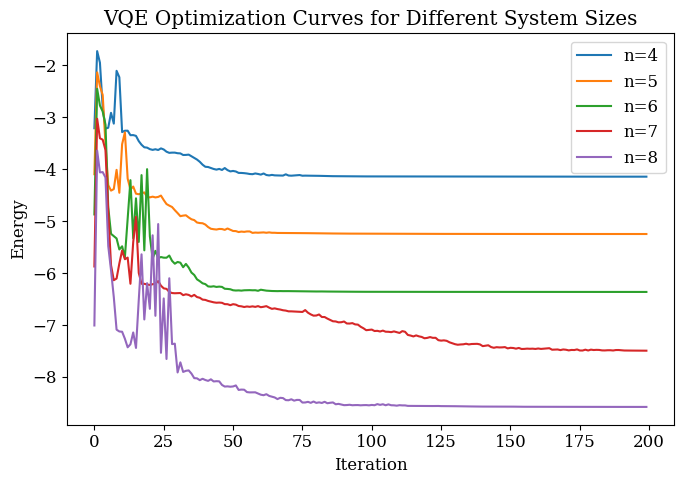

In [13]:
import numpy as np
from scipy.optimize import minimize
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

# ----------------------------- Hamiltonian helpers -----------------------------
PAULI_X = np.array([[0, 1], [1, 0]], dtype=complex)
PAULI_Y = np.array([[0, -1j], [1j, 0]], dtype=complex)
PAULI_Z = np.array([[1, 0], [0, -1]], dtype=complex)
IDENTITY = np.eye(2, dtype=complex)


def kron_n(ops):
    """Kronecker product of a list of operators (left-to-right)."""
    out = ops[0]
    for op in ops[1:]:
        out = np.kron(out, op)
    return out


def tfim_hamiltonian(n_qubits, J=1.0, h=1.0, periodic=False):
    """
    Build the TFIM Hamiltonian matrix for n_qubits:
      H = -J sum_{i} Z_i Z_{i+1} - h sum_i X_i
    If periodic=True, includes coupling between last and first qubit.
    Returns (H matrix as 2^n x 2^n numpy array).
    """
    dim = 2 ** n_qubits
    H = np.zeros((dim, dim), dtype=complex)

    # ZZ terms
    for i in range(n_qubits):
        j = (i + 1) % n_qubits
        if (not periodic) and (j == 0):
            # skip coupling from last to first when not periodic
            break
        ops = []
        for q in range(n_qubits):
            if q == i or q == j:
                ops.append(PAULI_Z)
            else:
                ops.append(IDENTITY)
        H -= J * kron_n(ops)

    # X terms
    for i in range(n_qubits):
        ops = []
        for q in range(n_qubits):
            ops.append(PAULI_X if q == i else IDENTITY)
        H -= h * kron_n(ops)

    return H


# ----------------------------- Ansatz / circuit --------------------------------

def ry_ansatz(n_qubits, n_layers, params):
    """
    Builds a parameterized ansatz circuit:
      - n_layers layers
      - each layer: RY on every qubit (with n_qubits parameters) then CNOT ladder entangling
    params should be shape (n_layers * n_qubits,)
    Returns a Qiskit QuantumCircuit and expects params flattened as 1D array.
    """
    if params.size != n_layers * n_qubits:
        raise ValueError("params length must equal n_layers * n_qubits")

    qc = QuantumCircuit(n_qubits)
    idx = 0
    for layer in range(n_layers):
        # single-qubit rotations
        for q in range(n_qubits):
            qc.ry(float(params[idx]), q)
            idx += 1
        # entangling ladder (CNOTs between q and q+1)
        for q in range(n_qubits - 1):
            qc.cx(q, q + 1)
    return qc


# ----------------------------- Expectation value --------------------------------

def expectation_from_statevector(statevec, H):
    """Compute <psi|H|psi> given statevector psi and Hamiltonian matrix H."""
    psi = statevec.data.reshape(-1, 1)
    val = float(np.vdot(psi, H @ psi).real)
    return val


def energy_for_params(params, n_qubits, n_layers, H):
    """Wrapper returning energy for optimizer given parameter vector."""
    qc = ry_ansatz(n_qubits, n_layers, params)
    sv = Statevector.from_instruction(qc)
    E = expectation_from_statevector(sv, H)
    return E


# ----------------------------- VQE driver ---------------------------------------

def run_vqe(n_qubits=4, J=1.0, h=1.0, n_layers=2, periodic=False, optimizer_method='COBYLA'):
    """
    Run VQE using statevector simulator + SciPy optimizer.
    Tracks the energy evaluated at each objective call so we can plot optimization progress.
    Returns a dict with results, info and an energy history list (one entry per objective evaluation).
    """
    H = tfim_hamiltonian(n_qubits, J=J, h=h, periodic=periodic)

    # initial guess - small random angles
    np.random.seed(42)
    initial_params = 0.1 * np.random.randn(n_layers * n_qubits)

    # store history of energies evaluated by the objective function
    energy_history = []

    # objective function for optimizer (also records energy history)
    def objective(x):
        E = energy_for_params(x, n_qubits, n_layers, H)
        energy_history.append(float(E))
        return E

    # call SciPy minimize
    print(f"Running VQE: n_qubits={n_qubits}, n_layers={n_layers}, optimizer={optimizer_method}")
    res = minimize(objective, initial_params, method=optimizer_method,
                   options={'maxiter': 200})

    final_params = res.x
    final_energy = res.fun

    # exact diagonalization for comparison
    eigenvals = np.linalg.eigvalsh(H)
    exact_ground = float(np.min(eigenvals.real))

    return {
        'result': res,
        'vqe_energy': final_energy,
        'vqe_params': final_params,
        'exact_energy': exact_ground,
        'H': H,
        'eigenvals': eigenvals,
        'energy_history': energy_history,
    }


# ----------------------------- Example usage ------------------------------------
if __name__ == '__main__':
    # Plot optimization curves for multiple system sizes n = 4..8
    import matplotlib.pyplot as plt

    sizes = [4, 5, 6, 7, 8]
    J = 1.0
    h = 0.8
    n_layers = 2

    plt.figure(figsize=(7,5))
    for n in sizes:
        results = run_vqe(n_qubits=n, J=J, h=h, n_layers=n_layers, periodic=False,
                          optimizer_method='COBYLA')
        print(f"--- Ansatz Circuit for n={n} ---")
        test_params = results['vqe_params']
        circuit = ry_ansatz(n, n_layers, test_params)
        print(circuit)
        # Plot the recorded energy history (may be empty if optimizer didn't call objective)
        plt.plot(results['energy_history'], label=f'n={n}')

    plt.title('VQE Optimization Curves for Different System Sizes' )
    plt.xlabel('Iteration')
    plt.ylabel('Energy')
    plt.legend()
    plt.tight_layout()
    plt.show()


## QUBO

QUBO matrix: [[ 2. -2. -2. -0.]
 [-2.  3. -2. -2.]
 [-2. -2.  3. -2.]
 [-0. -2. -2.  2.]]
Exact brute-force solve --
best x: [1 1 1 1]
best energy: -10.0
Simulated annealing (small example) --
sa best x: [1 1 1 1]
sa best energy: -42.0


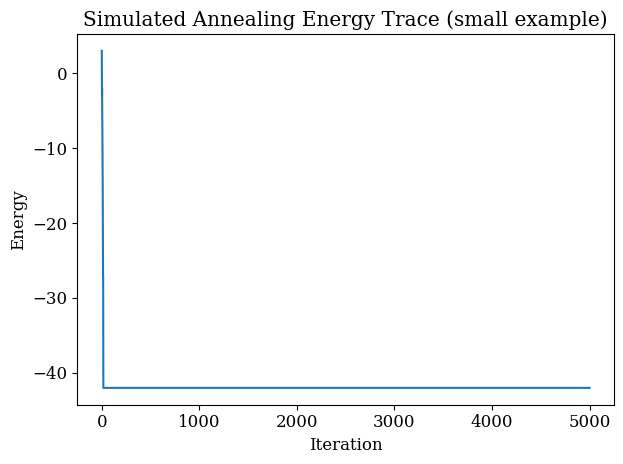

Generated hard random dense QUBO of size n=50, density=0.6
Restart 1/8 (iters=20000)...
Restart 2/8 (iters=20000)...
Restart 3/8 (iters=20000)...
Restart 4/8 (iters=20000)...
Restart 5/8 (iters=20000)...
Restart 6/8 (iters=20000)...
Restart 7/8 (iters=20000)...
Restart 8/8 (iters=20000)...
Hard instance results ---
Best energy found: -123.46734370756997
Found on restart: 0
Total time for 8 restarts: 2.82 s


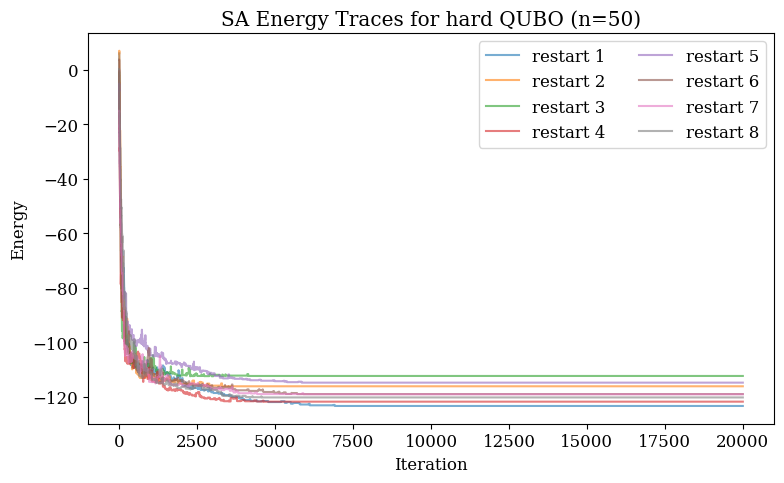

Best solution (first 20 bits): [1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0]
Best energy sample (first 50 history values): [6.084490720510131, np.float64(1.7177835301854465), np.float64(-1.1182877095994797), np.float64(-2.16461954259534), np.float64(-3.2394828619351896), np.float64(-7.442553557455741), np.float64(-17.252644994551748), np.float64(-17.252644994551748), np.float64(-16.90149307441957), np.float64(-16.90149307441957), np.float64(-20.2628064626253), np.float64(-22.83767296044384), np.float64(-23.18192990252825), np.float64(-23.148371273227855), np.float64(-23.148371273227855), np.float64(-23.148371273227855), np.float64(-23.148371273227855), np.float64(-22.811149800335684), np.float64(-25.95365337362487), np.float64(-25.95365337362487), np.float64(-25.95365337362487), np.float64(-26.65289970242842), np.float64(-26.65289970242842), np.float64(-26.65289970242842), np.float64(-26.65289970242842), np.float64(-28.412466296040353), np.float64(-28.412466296040353), np.float64(-28.41246

In [14]:
"""
Simple QUBO (Quadratic Unconstrained Binary Optimization) solver examples
- Exact brute-force solver (works for small n, n <= ~20)
- Simple simulated annealing solver (stochastic, scales to larger n)

Functions:
- qubo_energy(x, Q): compute binary vector x (0/1) energy x^T Q x
- solve_qubo_bruteforce(Q): enumerate all 2^n solutions, return best
- simulated_annealing_qubo(Q, n_iters=10000, init_temp=1.0, final_temp=1e-3): stochastic solver

Example usage at the bottom: a small Max-Cut-style QUBO built from an adjacency matrix.
"""

import numpy as np
import math
import random


def qubo_energy(x, Q):
    """Compute energy of binary vector x (1D array of 0/1) for QUBO matrix Q."""
    x = np.asarray(x).reshape(-1)
    return float(x @ Q @ x)


def solve_qubo_bruteforce(Q):
    """Brute-force search over all 2^n binary assignments. Returns (best_x, best_energy).
    Only practical for n up to ~20 (2^20 ~ 1e6) depending on your hardware.
    """
    n = Q.shape[0]
    best_energy = float('inf')
    best_x = None
    for s in range(1 << n):
        x = [(s >> i) & 1 for i in range(n)]
        e = qubo_energy(x, Q)
        if e < best_energy:
            best_energy = e
            best_x = np.array(x, dtype=int)
    return best_x, best_energy


def _random_neighbor(x):
    """Flip a random bit to create a neighbor state (returns new vector)."""
    n = x.size
    y = x.copy()
    i = random.randrange(n)
    y[i] = 1 - y[i]
    return y, i


def simulated_annealing_qubo(Q, n_iters=20000, init_temp=1.0, final_temp=1e-3, seed=None):
    """
    Basic simulated annealing for minimizing QUBO energy.
    - Q : QUBO matrix (numpy ndarray, shape n x n)
    - n_iters : number of iterations
    - init_temp, final_temp : temperature schedule endpoints (exponential cooling)

    Returns a dict with keys: best_x, best_energy, history (energies visited)
    """
    if seed is not None:
        random.seed(seed)
        np.random.seed(seed)

    n = Q.shape[0]
    # random initial configuration (0/1)
    x = np.random.randint(0, 2, size=n)
    curr_energy = qubo_energy(x, Q)
    best_x = x.copy()
    best_energy = curr_energy

    history = [curr_energy]

    for t in range(1, n_iters + 1):
        # temperature schedule (exponential)
        frac = t / float(n_iters)
        T = init_temp * (final_temp / init_temp) ** frac

        # pick neighbor by flipping one random bit (fast energy difference update)
        y, flipped = _random_neighbor(x)

        # compute energy difference efficiently: delta = E(y)-E(x)
        # E = x^T Q x ; flipping bit i from x_i to y_i changes energy by:
        # delta = (y_i - x_i) * (2 * (Q[i] @ x) - Q[i,i] * (y_i + x_i))
        i = flipped
        xi = x[i]
        yi = y[i]
        Qi = Q[i, :]
        # inner = sum_j Q[i,j] * x_j
        inner = float(Qi @ x)
        delta = (yi - xi) * (2 * inner - Q[i, i] * (yi + xi))

        accept = False
        if delta < 0:
            accept = True
        else:
            # Metropolis criterion
            p = math.exp(-delta / T) if T > 0 else 0.0
            if random.random() < p:
                accept = True

        if accept:
            x = y
            curr_energy = curr_energy + delta
            # record best
            if curr_energy < best_energy:
                best_energy = curr_energy
                best_x = x.copy()

        history.append(curr_energy)

    return {
        'best_x': best_x,
        'best_energy': best_energy,
        'history': history,
    }


# ----------------------------- Utility helpers ---------------------------------

def maxcut_qubo_from_adj(A, weight=1.0):
    """
    Build a QUBO for Max-Cut from adjacency matrix A (symmetric, zero-diagonal).
    One formulation: maximize sum_{i<j} A_ij * (x_i (1-x_j) + x_j (1-x_i))
    Convert to minimization QUBO by negating the objective.
    The resulting Q matrix is for binary variables x in {0,1} representing partition.
    """
    A = np.asarray(A)
    n = A.shape[0]
    Q = np.zeros((n, n))
    # Max-cut energy (to maximize): sum_{i<j} Aij * (x_i + x_j - 2 x_i x_j)
    # => Equivalent QUBO (minimize) : Q = -(-2 A) off-diagonals and linear terms handled on diagonal
    # We'll construct E(x) = x^T Q x such that minimizing E is equivalent to maximizing the cut
    # Start with Q_ij = 2 * A_ij for i != j (since x^T Q x contains 2 * Q_ij * x_i x_j when symmetric)
    for i in range(n):
        for j in range(i + 1, n):
            Q[i, j] = Q[j, i] = 2.0 * A[i, j]
    # diagonal terms collect linear contributions: for each i, linear coeff = -sum_j A_ij
    for i in range(n):
        Q[i, i] = -np.sum(A[i, :])

    # we want to *minimize* E = x^T Q x which corresponds to maximizing the original cut
    Q_min = -Q
    return Q_min


# ----------------------------- Example usage ------------------------------------
if __name__ == '__main__':
    import time
    try:
        import matplotlib.pyplot as plt
        has_plt = True
    except Exception:
        has_plt = False

    # --- small example (same as before) ---
    A = np.array([
        [0, 1, 1, 0],
        [1, 0, 1, 1],
        [1, 1, 0, 1],
        [0, 1, 1, 0]
    ], dtype=float)

    Q = maxcut_qubo_from_adj(A)
    print("QUBO matrix:", Q)

    print('Exact brute-force solve --')
    best_x, best_e = solve_qubo_bruteforce(Q)
    print('best x:', best_x)
    print('best energy:', best_e)

    print('Simulated annealing (small example) --')
    sa = simulated_annealing_qubo(Q, n_iters=5000, init_temp=1.0, final_temp=1e-4, seed=42)
    print('sa best x:', sa['best_x'])
    print('sa best energy:', sa['best_energy'])

    if has_plt:
        plt.figure()
        plt.plot(sa['history'])
        plt.xlabel('Iteration')
        plt.ylabel('Energy')
        plt.title('Simulated Annealing Energy Trace (small example)')
        plt.tight_layout()
        plt.show()

    # ----------------------------- Hard instance demo -----------------------------
    # Create a harder random dense QUBO instance. WARNING: size > 40-50 may be slow/memory heavy
    n_hard = 50
    density = 0.6  # fraction of nonzero off-diagonal terms
    rng = np.random.RandomState(123)

    # random symmetric matrix with both positive and negative couplings
    M = rng.randn(n_hard, n_hard)
    M = (M + M.T) / 2.0
    mask = rng.rand(n_hard, n_hard) < density
    mask = np.triu(mask, 1)
    Q_hard = np.zeros((n_hard, n_hard))
    Q_hard[np.triu_indices(n_hard, 1)] = M[np.triu_indices(n_hard, 1)] * mask[np.triu_indices(n_hard, 1)]
    Q_hard = Q_hard + Q_hard.T
    # add diagonal (linear) terms
    Q_hard[np.diag_indices(n_hard)] = rng.randn(n_hard) * 0.1

    print(f"Generated hard random dense QUBO of size n={n_hard}, density={density}")

    # Run multiple restarts of simulated annealing to try to find a good solution
    n_restarts = 8
    n_iters = 20000
    best_overall = None
    start_time = time.time()
    histories = []
    for r in range(n_restarts):
        print(f"Restart {r+1}/{n_restarts} (iters={n_iters})...")
        res = simulated_annealing_qubo(Q_hard, n_iters=n_iters, init_temp=1.0, final_temp=1e-4, seed=42 + r)
        histories.append(res['history'])
        if (best_overall is None) or (res['best_energy'] < best_overall['best_energy']):
            best_overall = res.copy()
            best_overall['restart'] = r
    total_time = time.time() - start_time

    print('Hard instance results ---')
    print(f"Best energy found: {best_overall['best_energy']}")
    print(f"Found on restart: {best_overall['restart']}")
    print(f"Total time for {n_restarts} restarts: {total_time:.2f} s")

    if has_plt:
        plt.figure(figsize=(8,5))
        for idx, h in enumerate(histories):
            plt.plot(h, alpha=0.6, label=f'restart {idx+1}')
        plt.xlabel('Iteration')
        plt.ylabel('Energy')
        plt.title(f'SA Energy Traces for hard QUBO (n={n_hard})')
        plt.legend(ncol=2)
        plt.tight_layout()
        plt.show()

    # Optionally, return or save best solution (here we just print a summary)
    print('Best solution (first 20 bits):', best_overall['best_x'][:20])
    print('Best energy sample (first 50 history values):', best_overall['history'][:50])
